<img src="https://www.rochester.edu/assets/images/ur-logo.svg">

# <center>[CSC 249/449: Machine Vision](https://www.cs.rochester.edu/~cxu22/t/249F20/)</center>

## Homework Submission
After completed the homework notebook. 
- Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your NetID below.
- `Kernel`$\rightarrow$ `Restart & Run All` (in the menubar).
- You can generated zip file using following command:
    ```python
    NetID=''
    make_submission(NetID)
    ```
- Double-check **generated zip file**, text, math, code, outputs, figures. Re-run if needed.
- Sumbit the zip file via blackboard.
- 1% deduction of late assignment total score per hour passing the deadline.
---------


##  Part 2. Image Gradient
---

### Problem 2.1

1. Design a kernel to compute $1^{st}$-order image gradients of x, y directions repectively
2. We use center difference as gradient: $\nabla_iI=I(i+1)-I(i)$
3. Kernel size should be `(1, 2)` for x direction and `(2, 1)` for y direction
4. use `cv2.filter2D` to apply kernel and show filtered 2 images https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=filter2d#filter2d

In [13]:
from cs249 import *
import cv2
import numpy as np

In [14]:
image = cv2.imread(str(data/'lena.tiff'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#### a. return X,Y filter

In [15]:
def firstorder():
    # YOUR CODE HERE
    kernel_x =np.array([-1,1])
    kernel_y= np.array([[-1],[1]])
    return kernel_x, kernel_y

#### b. apply two filters to each channel

In [16]:
# YOUR CODE HERE
k_x, k_y = firstorder()
Rx = cv2.filter2D(src=image[:,:,0], kernel=k_x, ddepth=-1)
Ry = cv2.filter2D(src=image[:,:,0], kernel=k_y, ddepth=-1)
Gx = cv2.filter2D(src=image[:,:,1], kernel=k_x, ddepth=-1)
Gy = cv2.filter2D(src=image[:,:,1], kernel=k_y, ddepth=-1)
Bx = cv2.filter2D(src=image[:,:,2], kernel=k_x, ddepth=-1)
By = cv2.filter2D(src=image[:,:,2], kernel=k_y, ddepth=-1)

#### c. display gradient of each channel of two convimgs with matplotlib (refer to our tutorial)
- use `cmap='jet'` to show the result

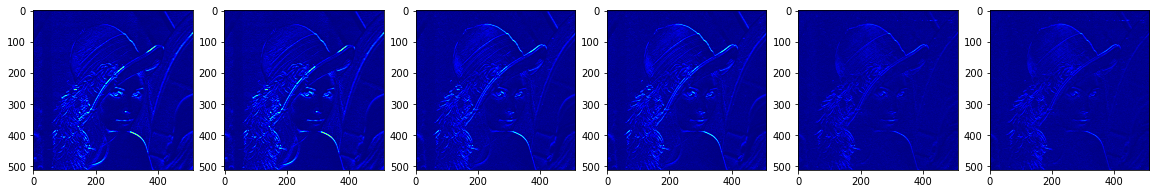

In [17]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,6,figsize=(20,40))
axs[0].imshow(Rx, cmap='jet')
axs[1].imshow(Ry, cmap='jet')
axs[2].imshow(Gx, cmap='jet')
axs[3].imshow(Gy, cmap='jet')
axs[4].imshow(Bx, cmap='jet')
axs[5].imshow(By, cmap='jet')

### Problem 2.2
    
The $2^{nd}$-order image gradient is defined as $\nabla^2I=\nabla^2_xI+\nabla^2_yI$

1. Refer class slides for $\nabla^2_xI,\nabla^2_yI$ of a `[3, 3]` kernel
2. Design positive and negetive kernel and use `cv2.filter2D` to apply kernel 
3. Plot the inward and outward edge

In [18]:
image = cv2.imread(str(data/'lena.tiff'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### a. design negetive and positive filter

In [19]:
def secondorder_negetive():
    # YOUR CODE HERE
    neg_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    return neg_kernel
def secondorder_positive():
    # YOUR CODE HERE
    pos_kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
    return pos_kernel

#### b. apply filter and display

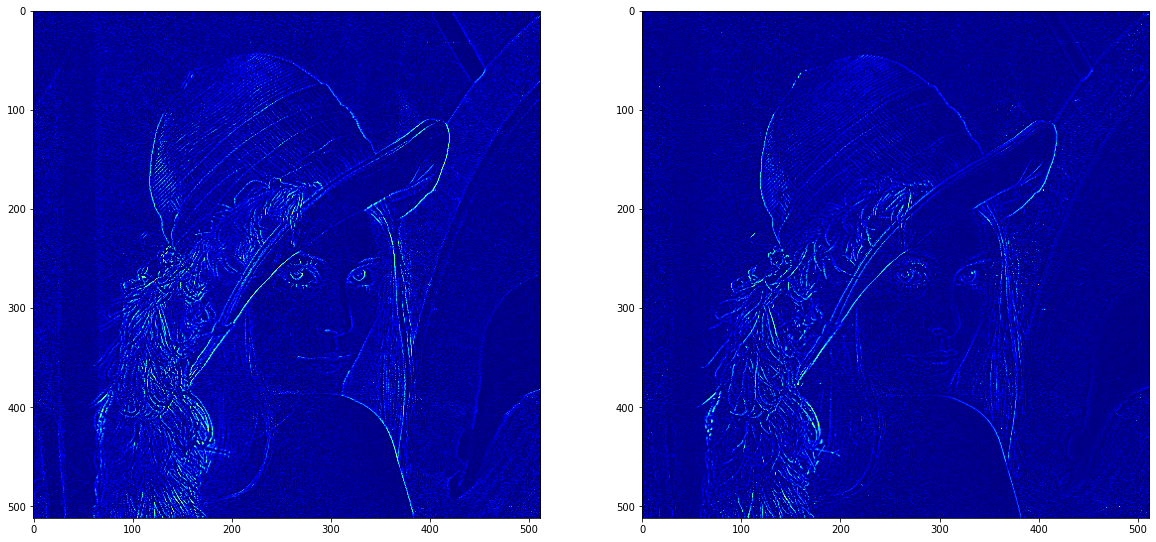

In [20]:
# YOUR CODE HERE
img_neg = cv2.filter2D(src=image, kernel=secondorder_negetive(), ddepth=-1)
img_pos = cv2.filter2D(src=image, kernel=secondorder_positive(), ddepth=-1)
fig, axs = plt.subplots(1,2,figsize=(20,40))
axs[0].imshow(img_neg,cmap='jet')
axs[1].imshow(img_pos,cmap='jet')

### Problem 2.3
    
Compare $2^{nd}$-order image gradient vs derivative of gaussian.  
In the class, we've introduced the sobel operator as the common approximation for derivative of gaussian

1. Refer class slides for the sobel operator and design filters for X,Y directions repectively
2. Apply the filters and compute the derivative of gaussian defined as
$$G=\sqrt[2]{G_x^2+G_y^2}$$

3. Computer  $2^{nd}$-order image gradient of following noisy image.
4. Plot the $2^{nd}$-order image gradient and derivative of gaussian, compare the result

In [21]:
image = cv2.imread(str(data/'lena_noise.png'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### a. design sobal filter

In [22]:
def sobel_x():
    # YOUR CODE HERE
    sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    return sobel_x
def sobel_y():
    # YOUR CODE HERE
    sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    return sobel_y

#### b. display and compare the derivative of gaussian and $2^{nd}$-order image gradient


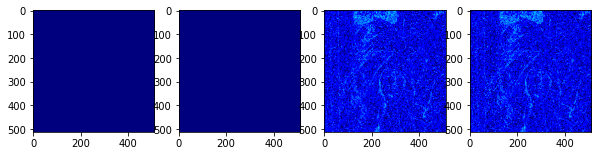

In [23]:
# YOUR CODE HERE
img_sobel_x = cv2.filter2D(src=image, kernel=sobel_x(), ddepth=-1)
img_sobel_y = cv2.filter2D(src=image, kernel=sobel_y(), ddepth=-1)
img_neg = cv2.filter2D(src=image, kernel=secondorder_negetive(), ddepth=-1)
img_pos = cv2.filter2D(src=image, kernel=secondorder_positive(), ddepth=-1)
fig, axs = plt.subplots(1,4,figsize=(10,20))
axs[0].imshow(img_sobel_x,cmap='jet')
axs[1].imshow(img_sobel_y,cmap='jet')
axs[2].imshow(img_neg,cmap='jet')
axs[3].imshow(img_pos,cmap='jet')

# NetID: yfan24
Student: Yangxin Fan